In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('../csv_data/titanic/train.csv')
df_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## analysing the dataframe

***checking of nan values***

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
no_of_missing = df_train.isna().sum().sort_values(ascending=False)
total = df_train.Survived.count()
pd.DataFrame({'total': no_of_missing, '%age': (no_of_missing / total)*100})

,total,%age
Embarked,2,0.224467
Fare,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
PassengerId,0,0.000000


***handling missing data and dropping columns***

In [9]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train.Age.fillna(round(df_train.Age.mean(), 1), inplace=True)
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,29.7,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [10]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'], dtype=object)

***graphical analysis***

In [11]:
female = df_train.loc[df_train.Sex=='female']
female

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...,...
880,881,1,2,female,25.0,0,1,26.0000,S
882,883,0,3,female,22.0,0,0,10.5167,S
885,886,0,3,female,39.0,0,5,29.1250,Q
887,888,1,1,female,19.0,0,0,30.0000,S


In [12]:
male = df_train.loc[df_train.Sex == 'male']
male

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,29.7,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...,...
883,884,0,2,male,28.0,0,0,10.5000,S
884,885,0,3,male,25.0,0,0,7.0500,S
886,887,0,2,male,27.0,0,0,13.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


Text(0.5, 1.0, 'Male')

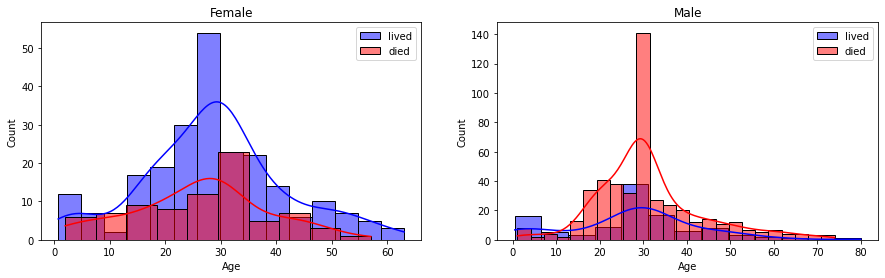

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax = sns.histplot(female.Age.loc[female.Survived==1], label='lived', ax=axes[0], kde=True, color='blue')
ax = sns.histplot(female.Age.loc[female.Survived==0], label='died', ax=axes[0], kde=True, color='red')
ax.legend()
ax.set_title('Female')

ax = sns.histplot(male.Age.loc[male.Survived==1], label='lived', ax=axes[1], kde=True, color='blue')
ax = sns.histplot(male.Age.loc[male.Survived==0], label='died', ax=axes[1], kde=True, color='red')
ax.legend()
ax.set_title('Male')

In [14]:
female.Age.loc[female.Survived==1].value_counts().head()

29.7    36
24.0    14
22.0    10
30.0     9
18.0     8
Name: Age, dtype: int64

In [36]:
female = female.dropna()
female.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


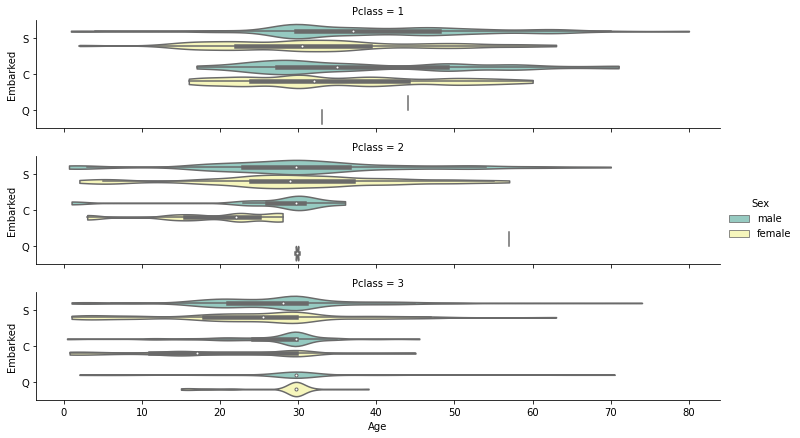

In [52]:
g = sns.catplot(x="Age", y="Embarked",
                hue="Sex", row="Pclass",
                data=df_train[df_train.Embarked.notnull()],
                orient="h", height=2, aspect=5, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

In [41]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...,...
880,881,1,2,female,25.0,0,1,26.0000,S
882,883,0,3,female,22.0,0,0,10.5167,S
885,886,0,3,female,39.0,0,5,29.1250,Q
887,888,1,1,female,19.0,0,0,30.0000,S
